# Sample Dataset for Testing Pandas Pivot Table


I’m sure you’ve come across the Titanic dataset in your data science journey.

https://www.kaggle.com/datasets/hesh97/titanicdataset-traincsv

 It’s among the first datasets we pick up when we’re ready to explore a project. I’ll be using that to show you the efficacy of the pivot_table function.

Let’s import the relevant libraries:

In [3]:
!pip install matplotlib

     |████████████████████████████████| 9.2 MB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 11.6 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     |████████████████████████████████| 1.2 MB 21.7 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 31.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.6 MB 81.7 MB/s eta 0:00:01


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [33]:
df = pd.read_csv('train.csv')

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


I will be dropping multiple columns to make it easier to analyze the data and demonstrate the capabilities of the pivot_table function:

In [35]:
df = df.drop(columns='PassengerId')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Building a Pivot Table Using Pandas

Time to build a pivot table in Python using the awesome Pandas library! We will explore the different facets of a pivot table in this article and build an awesome, flexible excel-style pivot table from scratch.

How to Group Data Using Index in a Pivot Table?
pivot_table requires data, and an index parameter
data is the Pandas dataframe you pass to the function.
index is the feature that allows you to group your data. The index feature will appear as an index in the resultant table. Generally, categorical columns are used as indexes.
I will be using the ‘Sex’ column as the index for now:

In [36]:
# using a single index or row

table = pd.pivot_table(data=df, index=['Sex'], values=['Age','Fare','Parch','Pclass','SibSp','Survived'])
table

,Age,Fare,Parch,Pclass,SibSp,Survived
Sex,,,,,,
female,27.915709,44.479818,0.649682,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,2.389948,0.429809,0.188908


We can instantly compare all the feature values for both the genders. Now, let’s visualize the finding.

<Axes: xlabel='Sex'>

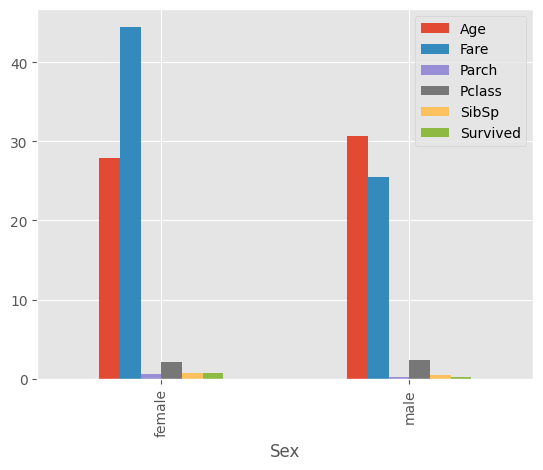

In [37]:
%matplotlib inline
import numpy as np
table.plot.bar()

Well, the female passengers paid remarkably more for the tickets than the male passengers.

# How to Run a Pivot With a Multi-Index?

You can even use more than one feature as an index to group your data. 

This increases the level of granularity in the resultant table, and you can get more specific with your findings:

In [22]:
# multiple index or multiple rows

table = pd.pivot_table(data=df, index=['Sex', 'Pclass'], values=['Age','Fare','Parch','SibSp','Survived'])
table

Age        Fare     Parch     SibSp  Survived
Sex    Pclass                                                     
female 1       34.611765  106.125798  0.457447  0.553191  0.968085
       2       28.722973   21.970121  0.605263  0.486842  0.921053
       3       21.750000   16.118810  0.798611  0.895833  0.500000
male   1       41.281386   67.226127  0.278689  0.311475  0.368852
       2       30.740707   19.741782  0.222222  0.342593  0.157407
       3       26.507589   12.661633  0.224784  0.498559  0.135447

Using multiple indexes on the dataset enables us to concur that the disparity in ticket fare 

for female and male passengers was valid across every Pclass on Titanic.

<Axes: xlabel='Sex,Pclass'>

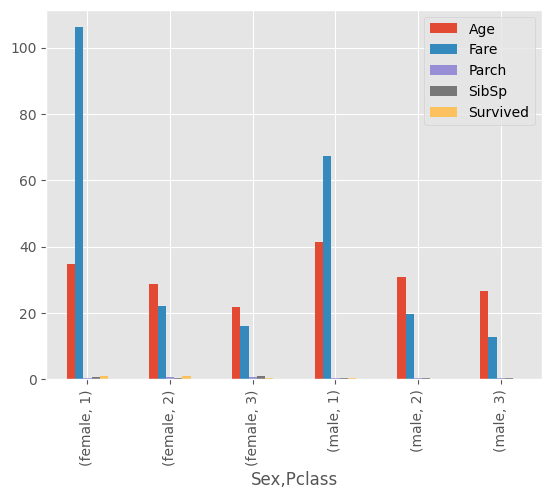

In [23]:
%matplotlib inline
import numpy as np
table.plot.bar()

## Different Aggregation Functions for Different Features

The values shown in the table are the result of the summarization that ***aggfunc*** applies to the feature data. 

***aggfunc*** is an aggregate function that pivot_table applies to your grouped data.

By default, it is ***np.mean()***, but you can use different aggregate functions for different features too! 

Just provide a dictionary as an input to the ***aggfunc*** parameter with the feature name as the key and the corresponding aggregate function as the value.

I will be using ***np.mean()*** to calculate the mean for the ‘Age’ feature and ***np.sum()*** 

to calculate the total survivors for the ‘Survived’ feature:

In [24]:
#different aggregate functions
table = pd.pivot_table(df,
                       index=['Sex','Pclass'], 
                       values=['Age','Fare','Parch','SibSp','Survived'],
                       aggfunc={'Age':np.mean,'Survived':np.sum})
table

Age  Survived
Sex    Pclass                     
female 1       34.611765        91
       2       28.722973        70
       3       21.750000        72
male   1       41.281386        45
       2       30.740707        17
       3       26.507589        47

The resultant table makes more sense in using different aggregating functions for different features.

<Axes: xlabel='Sex,Pclass'>

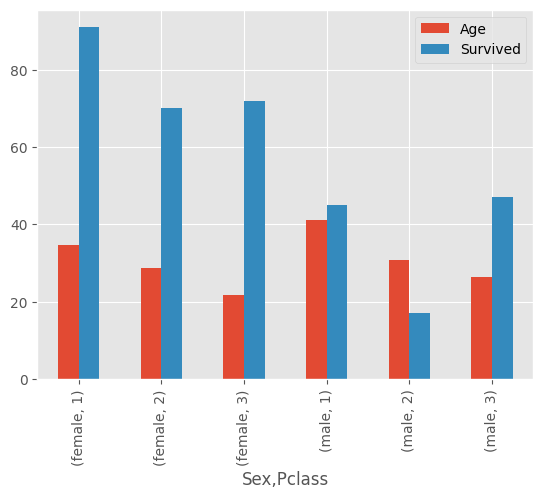

In [25]:
table.plot(kind='bar')

## Aggregate on Specific Features With Values Parameter

But what are you aggregating on? You can tell Pandas the feature(s) to apply the aggregate function on in the value parameter. 

The value parameter is where you tell the function which features to aggregate on. 

It is an optional field, and if you don’t specify this value, 

then the function will aggregate all the numerical features of the dataset:

In [26]:
table = pd.pivot_table(
    df,
    index=['Sex','Pclass'],
    values=['Survived'], 
    aggfunc=np.mean
    )
table

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

<Axes: xlabel='Sex,Pclass'>

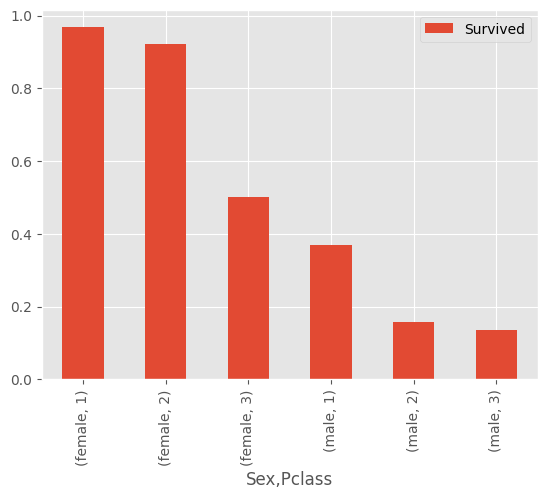

In [27]:
table.plot(kind='bar')

The survival rate of passengers aboard the Titanic decreased with a degrading Pclass among both the genders. 

Moreover, the survival rate of male passengers was lower than that of female passengers in any given Pclass.

# Find the Relationship Between Features With Columns Parameter

Using multiple features as indexes is fine, but using some features as columns will help you to intuitively understand the relationship between them. 

Also, the resultant table can always be better viewed by incorporating the columns parameter of the pivot_table.

The columns parameter is optional and displays the values horizontally on the top of the resultant table. 

Both columns and the index parameters are optional, but using them effectively will help you to intuitively understand the relationship between the features.

In [38]:
#columns
table = pd.pivot_table(df,index=['Sex'],columns=['Pclass'],values=['Survived'],aggfunc=np.sum)
table

Survived        
Pclass        1   2   3
Sex                    
female       91  70  72
male         45  17  47

Using Pclass as a column is easier to understand than using it as an index:

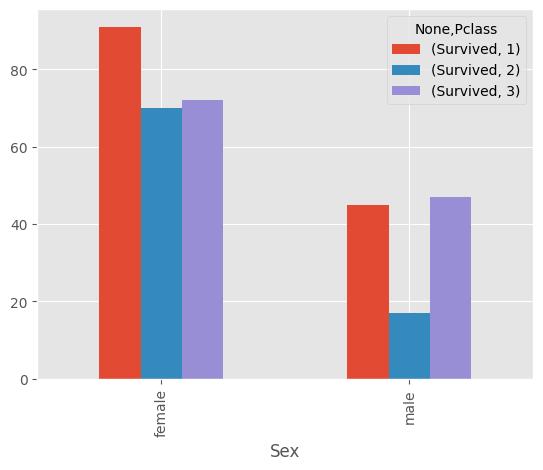

In [39]:
table.plot(kind='bar');


# Handling Missing Data

***pivot_table*** even allows you to deal with the missing values through the parameters ***dropna*** and ***fill_value***:

* ***dropna*** allows you to drop the null values in the grouped table whose all values are null
* ***fill_value*** parameter can be used to replace the NaN values in the grouped table with the values that you provide here

In [40]:
#display null values
table = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean)
table

Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 0        1       50.000000        NaN  13.500000
                2             NaN        NaN  36.000000
                3       20.700000  28.100000  23.688889
       1        1       35.675676  33.000000  33.619048
                2       19.142857  30.000000  29.091667
                3       11.045455  17.600000  22.548387
male   0        1       43.050000  44.000000  45.362500
                2       29.500000  57.000000  33.414474
                3       27.555556  28.076923  27.168478
       1        1       36.437500        NaN  36.121667
                2        1.000000        NaN  17.095000
                3       18.488571  29.000000  22.933333

I will be replacing the NaN values with the mean value from the ‘Age’ column:

In [41]:
#handling null values
table = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean,fill_value=np.mean(df['Age']))
table

Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 0        1       50.000000  29.699118  13.500000
                2       29.699118  29.699118  36.000000
                3       20.700000  28.100000  23.688889
       1        1       35.675676  33.000000  33.619048
                2       19.142857  30.000000  29.091667
                3       11.045455  17.600000  22.548387
male   0        1       43.050000  44.000000  45.362500
                2       29.500000  57.000000  33.414474
                3       27.555556  28.076923  27.168478
       1        1       36.437500  29.699118  36.121667
                2        1.000000  29.699118  17.095000
                3       18.488571  29.000000  22.933333

# Conclusion

We explored the different parameters of the awesome ***pivot_table*** function and how it allows you to easily summarise the features in your dataset through a single line of code.

# Frequently Asked Questions

### Q1. How do you create a pivot table in Python?

* A. We can create a pivot table in python using pandas. We use pandas.pivot_table function to create a pivot table in pandas. The following syntax is used:
pandas.pivot(self, index=None, columns=None, values=None, aggfunc)

### Q2. What is the DataFrame.pivot method?

* A. It is used to reshape an existing dataframe depending on the arguments we pass. This method takes three arguments: index, columns, and values.

### Q3. What is the difference between the pivot and pivot_table methods in Python Pandas?

* A. Pivot method is the basic function to create pivot table in which we cannot aggregate or summarize data, whereas pivot_table is an advanced method to create pivot table using which we can aggregate and summarise data.